In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Orbit Future Academy/00_NLP Mastery/Hands-On/NLP_05_06 Word Embedding & Deep Learning NLP

/content/drive/MyDrive/Orbit Future Academy/00_NLP Mastery/Hands-On/NLP_05_06 Word Embedding & Deep Learning NLP


# Load Data

In [ ]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


# Text Preprocessing

In [ ]:
'''
Disini, kita tidak banyak melakukan preprocessing karena kita tidak ingin mengubah makna (konteks) dari suatu kata yang menyusun suatu kalimat
'''
import re

def text_preprocessing(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()                               # Menghapus whitespaces
  return text

In [ ]:
%time data['clean_teks'] = data['teks'].apply(text_preprocessing)

CPU times: user 21.5 ms, sys: 690 µs, total: 22.2 ms
Wall time: 26.2 ms


In [ ]:
data.head()

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb hari hanya rp ribu spesial buat anda yang ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb hari hanya rp ribu spesial buat anda yang ...


# Word Embedding

## Word2Vec

In [ ]:
# Import library
import gensim

In [ ]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0       [promo, beli, paket, flash, mulai, gb, di, my,...
1       [gb, hari, hanya, rp, ribu, spesial, buat, and...
2       [plg, yth, sisa, kuota, flash, anda, kb, downl...
3       [plg, yth, sisa, kuota, flash, anda, kb, downl...
4       [gb, hari, hanya, rp, ribu, spesial, buat, and...
                              ...                        
1138    [yooo, sama, oke, nanti, aku, umumin, di, grup...
1139    [sebelumnya, ga, ad, nulis, kerudung, kirain, ...
1140                                [mba, mau, kirim, ya]
1141    [nama, beaok, bwrangkat, pagimau, cas, atay, t...
1142                    [no, bri, atas, nama, kamu, mana]
Name: clean_teks, Length: 1143, dtype: object

In [ ]:
# Defenisikan parameter training Word2Vec

MIN_COUNT = 1       # Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
WINDOW = 5          # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah kalimat.
EPOCH = 10          # Jumlah iterasi (epoch).
SG = 1              # Algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW.
SIZE = 5            # Dimensi vektor / neuron pada projection (hidden) layer

In [ ]:
# Proses training Word2Vec

%%time 
model_word2vec = gensim.models.Word2Vec(sentences, size=SIZE, sg=SG, min_count=MIN_COUNT, window=WINDOW, iter=EPOCH)

CPU times: user 1.78 s, sys: 85 ms, total: 1.87 s
Wall time: 1.49 s


In [ ]:
# Save word2vec model

path = "word2vec.bin.gz"
model_word2vec.wv.save_word2vec_format(path, binary=True)

In [ ]:
# Cari nilai vektor dari kata tertentu
model_word2vec.wv['hadiah']

array([ 0.69611406, -0.04051083, -2.4175942 , -2.0680299 ,  1.6037204 ],
      dtype=float32)

In [ ]:
# Menemukan kata kata teratas yang paling mirip dari kata terentu
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('hadiah')

[('mendptkan', 0.9982513189315796),
 ('mdpt', 0.9979038238525391),
 ('jf', 0.9978950023651123),
 ('meraih', 0.9971721172332764),
 ('noanda', 0.9966837167739868),
 ('dr', 0.996650218963623),
 ('honda', 0.9964308738708496),
 ('dri', 0.9954668879508972),
 ('jazz', 0.9943222999572754),
 ('mdptkan', 0.9937695264816284)]

In [ ]:
# Kata-kata yang ingin kita plot vektornya
word_list = ['hadiah', 'promosi', 'sms', 'malam', 'makan', 'telkomsel', 'selamat', 'juta', 'nama', 'duit', 'uang']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[ 0.69611406 -0.04051083 -2.4175942  -2.0680299   1.6037204 ]
 [-0.31519428 -0.22395872 -0.6227123  -0.6967131   0.09138268]
 [-0.67090607 -0.41280174 -0.40131512 -1.7714972   0.17922822]
 [-0.53627706 -0.27056107 -0.84979624 -1.2986639   0.2525956 ]
 [-0.7276334  -0.48319006 -0.8186432  -0.92830724  0.02019698]
 [-0.17118873  0.09589967 -1.2692778  -1.5117774   0.28037116]
 [ 0.61185724  0.05161077 -1.7673309  -2.106192    1.3441309 ]
 [ 0.47371107 -0.33261138 -1.40178    -1.6022214   0.44801828]
 [-1.3350774  -0.87430286 -0.894076   -0.70889163 -0.10583074]
 [-0.41142464 -0.24827658 -0.51788646 -0.59103113  0.11631902]
 [ 0.1215406  -0.27414486 -1.2433311  -1.5519205   0.5818392 ]]


In [ ]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [ ]:
# Lihat vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 1.8995154 ,  0.5930878 ],
       [-0.6867142 , -1.515409  ],
       [-0.5277443 ,  1.2125496 ],
       [-0.3863462 ,  0.33321056],
       [-0.7811333 ,  0.23893477],
       [ 0.14449768, -0.16054536],
       [ 1.4700456 ,  0.07428936],
       [ 0.5689711 , -0.7123251 ],
       [-1.2533562 ,  1.6629329 ],
       [-0.8178119 , -1.5410612 ],
       [ 0.37007618, -0.185664  ]], dtype=float32)

In [ ]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

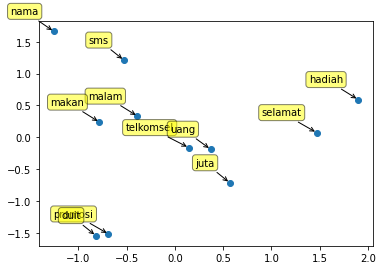

In [ ]:
plot(red_word_vectors, word_list)

## FastText (Pre-Trained Model)

In [ ]:
!pip -q install fasttext

     |████████████████████████████████| 68 kB 3.3 MB/s 


In [ ]:
# Download dan unzip dataset
# Warning: proses download lama dan memakan diskspace yang besar (sekitar 7GB)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gunzip cc.en.300.bin.gz

--2022-04-07 04:44:51--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  44.3MB/s    in 1m 48s  

2022-04-07 04:46:39 (39.6 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
import fasttext

# Load model FastText
ft_model = fasttext.load_model("cc.en.300.bin")

In [ ]:
# Lihat vektor kata tertentu menggunakan FastText
print(ft_model['hadiah'])

[ 2.31886618e-02 -9.02718380e-02 -3.26942317e-02  4.43942025e-02
  1.16834603e-01  1.29350051e-01 -1.75389405e-02  1.32096335e-01
 -1.11069754e-01  9.42594651e-03 -1.92331269e-01  4.87022214e-02
 -5.89958690e-02 -2.72452720e-02  2.42144074e-02  2.68125534e-03
 -6.44036084e-02  8.76408350e-03 -7.87095428e-02  5.56880720e-02
 -5.49955964e-02 -2.05840413e-02  2.97657382e-02 -1.48930848e-02
  5.00083379e-02  5.20066731e-02  5.92291020e-02  9.67174694e-02
  1.05014993e-02  2.70687371e-01  2.61476841e-02 -9.76984128e-02
 -3.81510258e-02 -5.54437637e-02  1.40345320e-02  5.98153472e-02
  2.05978937e-02  6.20838888e-02 -4.92071509e-02  4.86903377e-02
 -8.15637633e-02  9.45009813e-02  4.54714634e-02  2.62403525e-02
 -3.23774070e-02  3.31735723e-02 -2.53115129e-02  3.84174590e-03
 -2.66067982e-02 -3.60902213e-02  2.70026959e-02 -3.82749140e-02
 -1.75837670e-02  8.24360400e-02 -1.41439915e-01 -6.02689497e-02
 -1.00951986e-02  2.63172835e-02  3.92115526e-02  3.08932569e-02
  5.78716993e-02 -1.84465

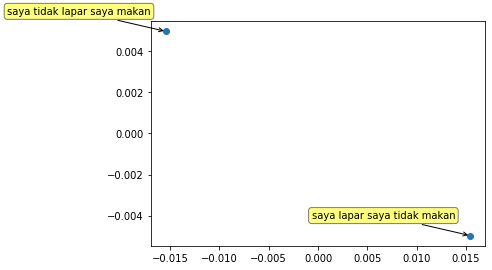

In [ ]:
list_kalimat = ['saya lapar saya tidak makan','saya tidak lapar saya makan'] 
word_vectors_fasttext = np.array([ft_model[w] for w in list_kalimat])
pca = PCA(n_components=2, copy=False, whiten=True) # Proses reduksi dimensi

fasttext_word_vectors = pca.fit_transform(word_vectors_fasttext)

plot(word_vectors_fasttext, list_kalimat)

# Deep Learning for NLP
Karena kita akan melakukan pemodelan dengan Deep Learning, maka jangan lupa setting runtime type ke GPU.

Runtime --> Change runtime type --> Hardware accelerator: Pilih GPU --> Save

## LSTM

### Data Splitting

In [ ]:
# Tentukan kolom yang akan digunkan
data = data[['clean_teks', 'label']]
data

,clean_teks,label
0,promo beli paket flash mulai gb di my telkomse...,2
1,gb hari hanya rp ribu spesial buat anda yang ...,2
2,plg yth sisa kuota flash anda kb download myte...,2
3,plg yth sisa kuota flash anda kb download myte...,2
4,gb hari hanya rp ribu spesial buat anda yang ...,2
...,...,...
1138,yooo sama oke nanti aku umumin di grup kelas,0
1139,sebelumnya ga ad nulis kerudung kirain warna jins,0
1140,mba mau kirim ya,0
1141,nama beaok bwrangkat pagimau cas atay tranfer,0


In [ ]:
# Buat data uji, data latih, dan data validasi
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=5)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=5)

In [ ]:
# Lihat shape (dimensi) dari masing-masing data
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(685, 2)
(229, 2)
(229, 2)


In [ ]:
# Pisahkan kolom fitur dan target (label)
trainX = np.array(data_train.iloc[:, 0])
trainY = np.array(data_train.iloc[:, 1])

testX = np.array(data_test.iloc[:, 0])
testY = np.array(data_test.iloc[:, 1])

valX = np.array(data_val.iloc[:, 0])
valY = np.array(data_val.iloc[:, 1])

### One-hot Encoding

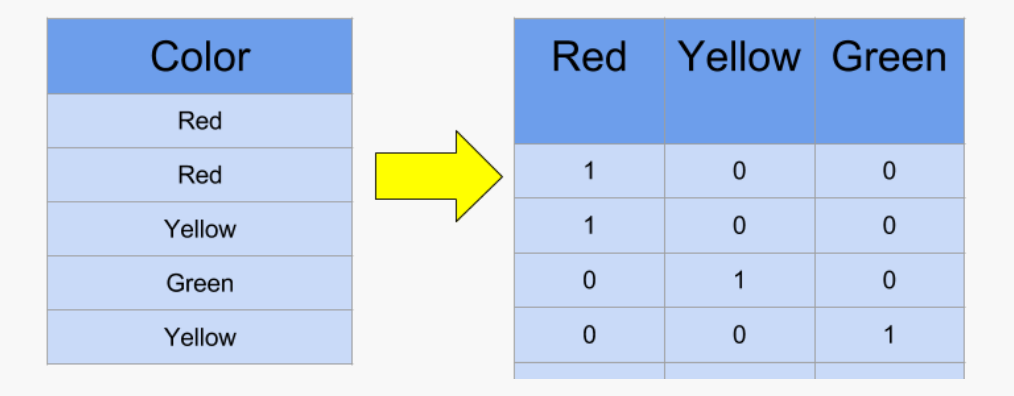

In [ ]:
# Lakukan one-hot encoding untuk target (label)

trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values
valY = pd.get_dummies(valY).values

In [ ]:
# Lihat shape (dimensi) dari hasil one-hot encoding

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(685, 3)
(229, 3)
(229, 3)


In [ ]:
# Lihat contoh hasil one-hot encoding
# 1 merujuk pada kelas pada data tertentu

trainY

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

### Tokenizing Data
Proses ini berbeda dengan tokenization pada text-preprocessing. Pada pemodelan dengandeep learning, tokenization merujuk pada pembutan dictionary.

In [ ]:
'''
Proses vektorisasi teks dengan mengubah setiap teks menjadi token urutan bilangan int (setiap bilangan int menjadi indeks token dalam dictionary) 
'''
from keras.preprocessing.text import Tokenizer

In [ ]:
NUM_WORDS = 100       # Frekuensi kemunculan kata. Hanya num_words-1 yang akan disimpan pada dictionary. Berarti kata dengan kemunculan >=100 tidak digunakan.
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary.

tokenizer = Tokenizer(num_words=100, oov_token=OOV_TOKEN, lower=True)   
tokenizer.fit_on_texts(trainX)

# Tambahkan token padding untuk menyamakan ukuran dimensi fitur input ke LSTM
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

word_index = tokenizer.word_index

In [ ]:
# Lihat dictionary yang telah dibuat proses tokenisasi
# Bilangan int merujuk pada indeks
print(word_index)

{'<unk>': 1, 'di': 2, 'anda': 3, 'ke': 4, 'info': 5, 'ini': 6, 'yg': 7, 'aku': 8, 'mau': 9, 'ada': 10, 'hadiah': 11, 'sms': 12, 'cek': 13, 'rp': 14, 'nama': 15, 'dan': 16, 'dari': 17, 'pin': 18, 'paket': 19, 'klik': 20, 'pulsa': 21, 'no': 22, 'aja': 23, 'hub': 24, 'ya': 25, 'hari': 26, 'untuk': 27, 'rb': 28, 'kalau': 29, 'selamat': 30, 'atau': 31, 'promo': 32, 'dr': 33, 'saya': 34, 'gb': 35, 'utk': 36, 'yang': 37, 'kuota': 38, 'jt': 39, 'resmi': 40, 'pemenang': 41, 'dengan': 42, 'isi': 43, 'tri': 44, 'uinfo': 45, 'gratis': 46, 'sd': 47, 'indosat': 48, 'care': 49, 'bisa': 50, 'ketik': 51, 'berlaku': 52, 'hanya': 53, 'ulang': 54, 'jam': 55, 'beli': 56, 'kamu': 57, 'telah': 58, 'nomor': 59, 'ga': 60, 'sudah': 61, 'pak': 62, 'nya': 63, 'bonus': 64, 'dgn': 65, 'nanti': 66, 'kami': 67, 'maaf': 68, 'kasih': 69, 'internetan': 70, 'bb': 71, 'kalo': 72, 'dg': 73, 'yth': 74, 'poin': 75, 'dulu': 76, 'nikmati': 77, 'mobil': 78, 'juga': 79, 'tapi': 80, 'internet': 81, 'pesan': 82, 'teh': 83, 'unit':

In [ ]:
# Lihat kata unik pada dictionary yang dihasilkan
len(word_index)

3151

In [ ]:
vocab_size = len(tokenizer.word_index)
vocab_size

3151

### Text to Sequences
Karena kita ingin menggunakan model berbasis RNN, maka kita perlu nmengubah data kita menjadi bentuk sequence agar bisa di fit kan ke model

In [ ]:
'''
Proses mengubah token teks menjadi urutan bilangan int.
'''
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

In [ ]:
# Lihat hasil dari text to sequences
# Setiap bilang int merujuk pada indeks token yang ada dalam dictionary yang dihasilkan pada proses Tokenizing Data
print(train_seqs)

[[1, 22, 3, 1, 11, 14, 1, 17, 1, 75, 1, 1, 1, 1, 1, 2, 1, 24, 1, 1, 1], [1, 49, 30, 1, 3, 91, 11, 84, 1, 1, 42, 18, 1, 27, 5, 20], [30, 3, 1, 11, 14, 1, 17, 1, 1, 1, 1, 24, 1, 1], [68, 1, 29, 1, 1, 31, 1, 25], [1, 1, 1, 12, 1, 36, 1, 12, 1, 1, 1, 1, 1, 1, 32, 14, 1, 1, 1, 55], [92, 69, 58, 1, 1, 1, 9, 1, 1, 1, 1, 1, 64, 46, 96, 1], [8, 1, 1, 1, 1], [1, 8, 1, 1, 1, 1, 33, 1, 56, 97, 1, 1, 7, 50, 1, 1, 1, 1, 1, 1], [1, 1, 8, 1, 76], [77, 1, 2, 1, 1, 1, 26, 1, 65, 1, 1, 1, 52, 5, 1], [1, 1, 23, 7, 9, 1, 1, 7, 1, 1, 1], [1, 29, 10, 37, 1, 1, 31, 1], [1, 1, 57, 7, 1, 70, 1, 28, 1, 1, 70, 1, 1, 38, 35, 1, 51, 1, 4, 1, 47, 1, 59, 6], [1, 66, 1, 55, 98, 1, 60, 1, 26, 6], [1, 22, 3, 1, 78, 1, 33, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 67], [1, 66, 34, 1, 42, 1, 1, 99, 7, 1, 1], [69, 1, 23, 1, 1, 1, 10, 7, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 29, 10, 1, 1, 1, 1], [1, 1, 1, 1, 37, 1, 1, 10, 1, 1, 42, 1, 1, 2, 1, 1, 1, 46, 2], [1, 1, 15, 1, 15, 1, 1, 1, 1], [1, 1, 1, 14, 28, 36, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Lihat hasil setelah di ubah menjadi sequences
print(trainX[10])
print(train_seqs[10])

paling seikhlasnya aja yg mau nyumbang mangga yg ngga mangga gt
[1, 1, 23, 7, 9, 1, 1, 7, 1, 1, 1]


### Padding & Truncate

In [ ]:
'''
Proses mengubah data dari sequence menjadi array bentuk 2D Numpy (num_samples, num_timesteps). 
num_timesteps adalah argumen maxlen jika disediakan, atau panjang dari sequence terpanjang dalam daftar.

Sequence yang lebih pendek dari num_timesteps diisi dengan nilai hingga panjangnya sama dengan num_timesteps (padding).
Sequence yang lebih panjang dari num_timesteps dipotong sehingga sesuai dengan panjang yang diinginkan (truncate).
'''

from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Lihat distribusi jumlah kata dalam X_train_seq.
# Pada contoh ini, max_len tidak ditentukan, sehingga semua data dari sequence akan di padding menjadi panjang yang sesuai dengan sequnce terpanjang. Dalam contoh ini kita akan menentukan max_len:60.
l = [len(i) for i in train_seqs]
l = np.array(l)

print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 59
median number of words: 59.0
average number of words: 59.0
maximum number of words: 59


In [ ]:
PADDING = 'pre' # Terdapat dua pilihan dalam melakukan padding 'pre' or 'post'.
MAX_LEN = 60

train_seqs = pad_sequences(train_seqs, padding=PADDING, maxlen=MAX_LEN)
val_seqs = pad_sequences(val_seqs, padding=PADDING, maxlen=MAX_LEN)
test_seqs = pad_sequences(test_seqs, padding=PADDING, maxlen=MAX_LEN)

In [ ]:
# Lihat hasil sequences di padding
print(trainX[10])
print(train_seqs[10])

paling seikhlasnya aja yg mau nyumbang mangga yg ngga mangga gt
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1 23  7  9  1  1  7  1  1  1]


In [ ]:
# Lihat panjang sequences yang telah di padding
print(len(train_seqs[10]))

60


### Define Model



In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten

model_LSTM = Sequential()
model_LSTM.add(Embedding(len(word_index), 200))         # Buat embedding layer yang menerima panjang dictionary
model_LSTM.add(LSTM(100))                               # Tambahkan satu layer LSTM
model_LSTM.add(Dense(3, activation='softmax'))

In [ ]:
# Compile model
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [ ]:
%%time

EPOCH = 10
BATCH_SIZE = 64

history_LSTM = model_LSTM.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/10
11/11 [==============================] - 10s 143ms/step - loss: 1.0458 - accuracy: 0.4394 - val_loss: 0.8445 - val_accuracy: 0.5852
Epoch 2/10
11/11 [==============================] - 0s 30ms/step - loss: 0.8454 - accuracy: 0.5620 - val_loss: 0.7520 - val_accuracy: 0.6332
Epoch 3/10
11/11 [==============================] - 0s 32ms/step - loss: 0.7234 - accuracy: 0.6701 - val_loss: 0.6222 - val_accuracy: 0.7598
Epoch 4/10
11/11 [==============================] - 0s 30ms/step - loss: 0.6281 - accuracy: 0.7825 - val_loss: 0.5290 - val_accuracy: 0.7860
Epoch 5/10
11/11 [==============================] - 0s 31ms/step - loss: 0.4933 - accuracy: 0.8204 - val_loss: 0.4645 - val_accuracy: 0.8559
Epoch 6/10
11/11 [==============================] - 0s 30ms/step - loss: 0.3699 - accuracy: 0.8672 - val_loss: 0.3451 - val_accuracy: 0.8952
Epoch 7/10
11/11 [==============================] - 0s 32ms/step - loss: 0.2920 - accuracy: 0.8993 - val_loss: 0.3285 - val_accuracy: 0.8996
Epoch 8/10


In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

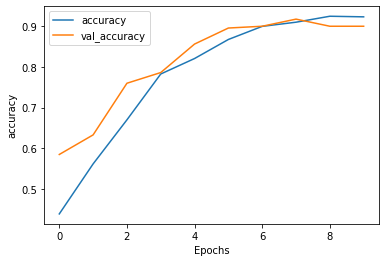

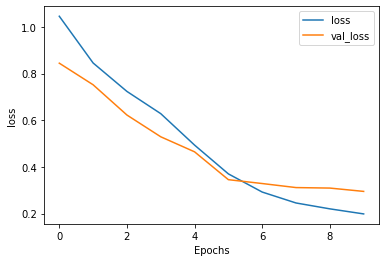

In [ ]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.439416 	   1.045760 	   0.585153 	   0.844516
       2   0.562044 	   0.845362 	   0.633188 	   0.751951
       3   0.670073 	   0.723423 	   0.759825 	   0.622234
       4   0.782482 	   0.628146 	   0.786026 	   0.528966
       5   0.820438 	   0.493279 	   0.855895 	   0.464484
       6   0.867153 	   0.369906 	   0.895196 	   0.345067
       7   0.899270 	   0.291995 	   0.899563 	   0.328523
       8   0.909489 	   0.245167 	   0.917031 	   0.311189
       9   0.924088 	   0.219976 	   0.899563 	   0.309056
      10   0.922628 	   0.198261 	   0.899563 	   0.294808


### Evaluate

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model_LSTM.evaluate(test_seqs, testY)

8/8 [==============================] - 1s 7ms/step - loss: 0.2869 - accuracy: 0.9039


In [ ]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       130
           1       0.85      1.00      0.92        60
           2       0.80      0.82      0.81        39

    accuracy                           0.90       229
   macro avg       0.87      0.90      0.88       229
weighted avg       0.91      0.90      0.90       229



## LSTM + Word Embedding
Contoh sebelumnya kita hanya menggunakan dictionary yang dihasilkan ketika proses Tokenizing Data. Lalu, ketika pemodelan ditambahkan layer embedding sebelum di fitkan ke layer LSTM.


Selanjutnya, kita akan memanfaatkan word2vec yang telah dilatih pada proses sebelumnya untuk mengubah teks menjadi bentuk vektor.





### Load Word2Vec

In [ ]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

reloaded_word_vectors = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
words = list(reloaded_word_vectors.vocab)
print('Word2Vec Vocabulary size: %d' % len(words))

# Save vocabulary word2vec 
filename = 'embedding_word2vec.txt'
reloaded_word_vectors.save_word2vec_format(filename, binary=False)

Word2Vec Vocabulary size: 4289


In [ ]:
embedding_vector = {}

f = open('embedding_word2vec.txt')
for line in f:
  value = line.split(' ')
  word = value[0]
  coef = np.array(value[1:],dtype = 'float32')
  embedding_vector[word] = coef

# Lihat embedding vector dari word2vec
print(embedding_vector)

{'4289': array([5.], dtype=float32), 'di': array([-0.7310894 , -0.09973871, -0.98048484, -1.2206912 , -0.04114673],
      dtype=float32), 'anda': array([ 0.54570913,  0.32001245, -1.8420908 , -1.9767582 ,  0.9865137 ],
      dtype=float32), 'ke': array([-0.1462768 , -0.4350562 , -0.94798803, -1.395099  ,  0.4413453 ],
      dtype=float32), 'ini': array([-1.2493688 , -0.20863843, -0.47885346, -1.5613449 , -0.06248597],
      dtype=float32), 'info': array([ 0.5214528,  0.0273569, -1.6475341, -1.6771072,  0.4149417],
      dtype=float32), 'ada': array([-1.591984  , -1.3151215 , -1.1139598 , -0.5024696 , -0.32273278],
      dtype=float32), 'yg': array([-1.4543188 , -1.0783328 , -1.036881  , -0.47910434,  0.17006817],
      dtype=float32), 'aku': array([-1.5724972 , -1.1531295 , -1.2043536 , -0.37707686, -0.11095032],
      dtype=float32), 'mau': array([-1.3322663 , -0.9895836 , -0.94115645, -0.7402078 , -0.11341463],
      dtype=float32), 'dan': array([-1.1269065 , -0.05402092, -0.9364185 

In [ ]:
word2vec_dim = 5 # Sesuaikan dengan dimensi word2vec. Pada contoh ini dimensinya adalah 5

embedding_matrix = np.zeros((vocab_size, word2vec_dim))

for word, i in tokenizer.word_index.items():
  embedding_value = embedding_vector.get(word)
  if embedding_value is not None:
    embedding_matrix[i] = embedding_value    

### Define Model
Nah, sekarang kita membahkan layer embedding berdasarkan matrix embedding yang di dapatkan dari word2vec.



In [ ]:
model_LSTM_we = Sequential()
model_LSTM_we.add(Embedding(vocab_size, word2vec_dim, weights=[embedding_matrix]))
model_LSTM_we.add(LSTM(100))
model_LSTM_we.add(Dense(3, activation='softmax'))

In [ ]:
# Compile model
model_LSTM_we.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [ ]:
%%time

EPOCH = 10
BATCH_SIZE = 64

history_LSTM_we = model_LSTM.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/10
11/11 [==============================] - 0s 34ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.7623 - val_accuracy: 0.8908
Epoch 2/10
11/11 [==============================] - 0s 26ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.7069 - val_accuracy: 0.8996
Epoch 3/10
11/11 [==============================] - 0s 26ms/step - loss: 0.0089 - accuracy: 0.9985 - val_loss: 0.7274 - val_accuracy: 0.8952
Epoch 4/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.7506 - val_accuracy: 0.8908
Epoch 5/10
11/11 [==============================] - 0s 26ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.7469 - val_accuracy: 0.8908
Epoch 6/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.7307 - val_accuracy: 0.8996
Epoch 7/10
11/11 [==============================] - 0s 29ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.7889 - val_accuracy: 0.8865
Epoch 8/10
11

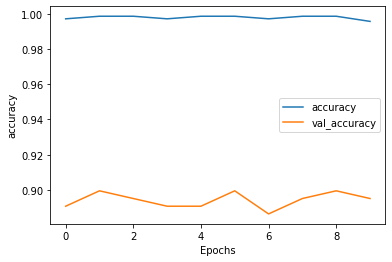

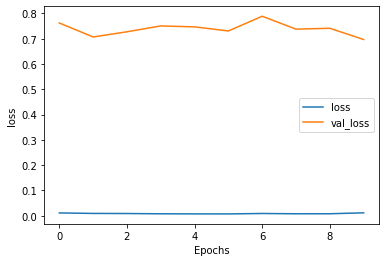

In [ ]:
plot_graphs(history_LSTM_we, 'accuracy')
plot_graphs(history_LSTM_we, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM_we.history['accuracy'][i], history_LSTM_we.history['loss'][i], history_LSTM_we.history['val_accuracy'][i], history_LSTM_we.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.997080 	   0.011229 	   0.890830 	   0.762309
       2   0.998540 	   0.009254 	   0.899563 	   0.706936
       3   0.998540 	   0.008857 	   0.895196 	   0.727402
       4   0.997080 	   0.007817 	   0.890830 	   0.750617
       5   0.998540 	   0.007476 	   0.890830 	   0.746882
       6   0.998540 	   0.007323 	   0.899563 	   0.730656
       7   0.997080 	   0.008997 	   0.886463 	   0.788879
       8   0.998540 	   0.007875 	   0.895196 	   0.737842
       9   0.998540 	   0.007983 	   0.899563 	   0.741299
      10   0.995620 	   0.011626 	   0.895196 	   0.696848


### Evaluate

In [ ]:
# Lakukan prediksi pada data uji
y_pred = np.argmax(model_LSTM_we.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model_LSTM_we.evaluate(test_seqs, testY)

8/8 [==============================] - 1s 8ms/step - loss: 1.1269 - accuracy: 0.1310


In [ ]:
# Tampilkan laporan klasifikasi yang dilakukan model pada data uji
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.14      0.32      0.19        50
           1       0.00      0.00      0.00         0
           2       0.35      0.08      0.13       179

    accuracy                           0.13       229
   macro avg       0.16      0.13      0.11       229
weighted avg       0.30      0.13      0.14       229



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Resume

Berdasarkan hasil eksperimen diatas, akurasi model LSTM + word2vec lebih rendah daripada model LSTM standar.

Kenapa ya kira2 ??? Silahkan dicoba sendiri dengan mentraining ulang word2vec dengan parameter yang berbeda.

Viel Glück! 😃